In [ ]:
https://developer.myptv.com/en/documentation/loading-space-optimization-api

In [ ]:

{
   "bins": [{
    "id": "Truck",
    "dimensions": {"x":240,"y":244,"z":1360},
    "maximumWeightCapacity": 20000000
}],
   "items": [{
    "id": "Large Packets",
    "numberOfInstances": 10,
    "dimensions": {"x":120,"y":80,"z":180},
    "weight": 50000
},
{
    "id": "Small Packets",
    "numberOfInstances": 5,
    "dimensions": {"x":120,"y":80,"z":30},
    "weight": 70000
},
{
    "id": "Quadratic Boxes",
    "numberOfInstances": 2,
    "dimensions": {"x":200,"y":200,"z":200},
    "weight": 800000,
    "maximumSurfaceLoads": {"x":0,"y":0,"z":0}
},
{
    "id": "Large Boxes",
    "numberOfInstances": 2,
    "dimensions": {"x":200,"y":240,"z":110},
    "weight": 1500000
}],
   "options": {}
}

In [ ]:
def optimize_with_focus(api_key):
    url = "https://api.myptv.com/loading-space-optimization/v1/binPacking"
    payload = {
        "items": [ /* your items definition */ ],
        "bins": [ /* your bins definition */ ],
        "focus": "OPTIMIZE_VOLUME_UTILIZATION"  # Focus on volume optimization
    }
    response = requests.post(url, json=payload, headers={"apiKey": api_key})
    return response.json()

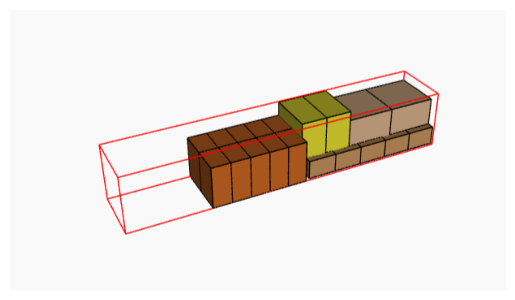

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/content/FOcus Optimization.png"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


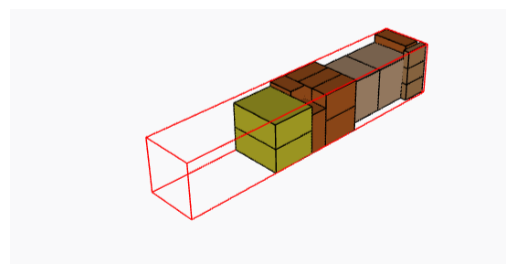

In [ ]:
image_path = "/content/Focus Reduce Layers.png"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
def optimize_stackability(api_key):
    url = "https://api.myptv.com/loading-space-optimization/v1/binPacking"
    payload = {
        "items": [ /* your items definition with stackability features */ ],
        "bins": [ /* your bins definition */ ],
        "stackingRules": {
            "allowableStackingHeight": 0  # Example rule for stack height (1-4 for stack)
        }
    }
    response = requests.post(url, json=payload, headers={"apiKey": api_key})
    return response.json()


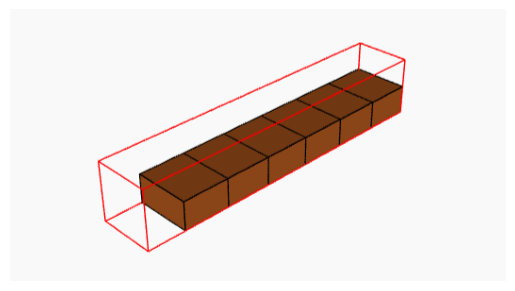

In [ ]:
image_path = "/content/Focus Stackability.png"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
def optimize_loading_space(api_key):
    # Step 1: Optimize focus
    focus_result = optimize_with_focus(api_key)

    # Step 2: Optimize stackability
    stackability_result = optimize_stackability(api_key)

    # Step 3: Optimize orientation
    orientation_result = optimize_orientation(api_key)


    return {
        "Focus Optimization": focus_result,
        "Stackability Optimization": stackability_result,
        "Orientation Optimization": orientation_result,
    }

# Execute with your API key
api_key = "YOUR_API_KEY"
results = optimize_loading_space(api_key)
print(results)


In [ ]:
# response gives back ID to check
{
  "id": "9c0aca73-572f-42aa-9236-ff12ccf0e105"
}

# Special CASE

# Input Data:
Truck dimensions (length, width, height).
Items with their dimensions, weights, and positions.
Loading and unloading instructions at intermediate points.

# Initial Setup:
Define truck dimensions and initialize the current load.
Define items with their dimensions and positions.

# Processing Stops:
For each stop, determine items to unload based on their position (starting with items stacked far inside).
Load new items based on available space and remaining capacity.

# Space Utilization:
Optimize space utilization by placing larger items in the available space first.
Adjust positions based on the need to unload earlier items that are deeper inside.

# Real-time Integration:
Update real-time data with the current load and capacity.
Integrate with 3PL partners for capacity sharing if needed.

# Generate Response:
Provide details on item positions in the truck after each stop.

Lets Include a visual representation or detailed list of item positions.

# Step 1: Pre-processing

Sort the parcels/mail by their volume in descending order (largest to smallest).
Assign a unique identifier to each parcel/mail.

# Step 2: Loading

Initialize an empty truck with a capacity of 100% (or the maximum capacity of the truck).
Iterate through the sorted list of parcels/mail:
For each parcel/mail, calculate its volume as a percentage of the truck's capacity.
If the parcel/mail can be loaded without exceeding the truck's capacity, load it and update the truck's capacity accordingly.
If the parcel/mail cannot be loaded, skip it and move to the next one.

# Step 3: Unloading and Re-loading

At each intermediate point (e.g., Ajmer, Jaipur), iterate through the loaded parcels/mail in the reverse order of their loading sequence:
For each parcel/mail, check if it needs to be unloaded at the current intermediate point.
If it needs to be unloaded, remove it from the truck and update the truck's capacity accordingly.
If it doesn't need to be unloaded, move to the next parcel/mail.
After unloading, re-load any new parcels/mail that need to be added at the current intermediate point, following the same loading rules as in Step 2.

# Step 4: Optimization

At each intermediate point, re-optimize the loading sequence by re-sorting the remaining parcels/mail by their volume in descending order.
Repeat Step 3 until all intermediate points have been processed.

# Key Considerations

To address the issue of loads that need to be unloaded earlier being stacked far inside, we can introduce a "priority" factor to the loading sequence. For example, parcels/mail with earlier unloading points can be assigned a higher priority, ensuring they are loaded closer to the front of the truck.
To address the issue of larger items being loaded behind smaller items, we can use a "layering" approach. For example, we can divide the truck's capacity into layers, and load larger items in the lower layers, while smaller items are loaded in the upper layers. This way, smaller items can be unloaded without having to remove larger items.

In [ ]:
class Parcel:
    def __init__(self, volume, unload_at):
        self.volume = volume
        self.unload_at = unload_at
        self.priority = self.get_priority(unload_at)

    def get_priority(self, unload_at):
        # assign priority based on unloading point
        # earlier unloading points have higher priority
        return unload_at

class Truck:
    def __init__(self, capacity, layers=3):
        self.capacity = capacity
        self.layers = layers
        self.loading_sequence = []
        self.truck_capacity = capacity

    def load(self, parcel, layer):
        if self.truck_capacity >= parcel.volume:
            self.loading_sequence.append((parcel, layer))
            self.truck_capacity -= parcel.volume
        else:
            print("Cannot load parcel, not enough capacity")

    def unload(self, parcel):
        if parcel in [p for p, _ in self.loading_sequence]:
            self.loading_sequence.remove((parcel, _))
            self.truck_capacity += parcel.volume
        else:
            print("Parcel not found in truck")

    def get_layer(self, volume):
        # determine layer based on size
        # e.g., larger items in lower layers, smaller items in upper layers
        if volume > 0.5 * self.capacity:
            return 1  # lower layer
        elif volume < 0.2 * self.capacity:
            return 3  # upper layer
        else:
            return 2  # middle layer

    def optimize_loading_sequence(self):
        self.loading_sequence.sort(key=lambda x: (x[0].priority, -x[0].volume))

def dvso_pl(parcels, truck):
    # Pre-processing: sort parcels by volume and assign priority
    parcels.sort(key=lambda x: -x.volume)
    for parcel in parcels:
        parcel.priority = parcel.get_priority(parcel.unload_at)


    for parcel in parcels:
        layer = truck.get_layer(parcel.volume)
        truck.load(parcel, layer)


    intermediate_points = ["Ajmer", "Jaipur"]
    for point in intermediate_points:
        for parcel, layer in truck.loading_sequence[::-1]:
            if parcel.unload_at == point:
                truck.unload(parcel)
                truck.truck_capacity += parcel.volume
            else:
                continue
        new_parcels = []
        for parcel in new_parcels:
            layer = truck.get_layer(parcel.volume)
            truck.load(parcel, layer)

        truck.optimize_loading_sequence()

parcels = [
    Parcel(0.4, "Ajmer"),
    Parcel(0.3, "Jaipur"),
    Parcel(0.2, "Ajmer"),
    Parcel(0.1, "Jaipur"),
    Parcel(0.5, "Ajmer"),
    Parcel(0.6, "Jaipur"),
]

truck = Truck(100)
dvso_pl(parcels, truck)

In [ ]:
def pack_bins(api_key):
    url = "https://api.myptv.com/loading-space-optimization/v1/binPacking"
    #payload = {
     #   "items": [ /* your items definition with stackability features */ ],
       # "bins": [ /* your bins definition */ ],
       # get truck attributes & pass in Json

    response = requests.post(url, json=payload, headers={"apiKey": api_key})
    return response.json()